In [20]:
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import datetime
import matplotlib.pyplot as plt
from keras.models import Input, Model, Sequential
from keras.layers import Conv2D, MaxPool2D, Conv2DTranspose, UpSampling2D
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.initializers import RandomNormal
from keras.callbacks import EarlyStopping

% matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

In [21]:
def keras_generator():
  # use tutorial from https://medium.com/towards-data-science/gan-by-example-using-keras-on-tensorflow-backend-1a6d515a60d0
  g = Sequential()
  dropout = 0.4
  depth = 256
  dim = 7
  # In: 100
  # Out: dim x dim x depth
  g.add(Dense(dim * dim * depth, input_dim=100))
  g.add(BatchNormalization(momentum=0.9))
  g.add(Activation('relu'))
  g.add(Reshape((dim, dim, depth)))
  g.add(Dropout(dropout))
  # In: dim x dim x depth
  # Out: 2*dim x 2*dim x depth/2
  g.add(UpSampling2D())
  g.add(Conv2DTranspose(int(depth / 2), 5, padding='same'))
  g.add(BatchNormalization(momentum=0.9))
  g.add(Activation('relu'))
  g.add(UpSampling2D())
  g.add(Conv2DTranspose(int(depth / 4), 5, padding='same'))
  g.add(BatchNormalization(momentum=0.9))
  g.add(Activation('relu'))
  # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
  g.add(Conv2DTranspose(1, 5, padding='same'))
  g.add(Activation('sigmoid'))
  g.summary()
  return g

In [34]:
noise = np.random.uniform(-1.0, 1.0, size=[256, 100])
g = keras_generator()
images = keras_generator()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_11 (Batc (None, 12544)             50176     
_________________________________________________________________
activation_14 (Activation)   (None, 12544)             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 14, 14, 128)       819328    
__________

In [ ]:
# Save the trained model to file
DIRECTORY = "./learned_model/"
MODEL_FILE = "generator.h5"

if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
d.save(os.path.join(DIRECTORY, MODEL_FILE))

TypeError: Invalid dimensions for image data

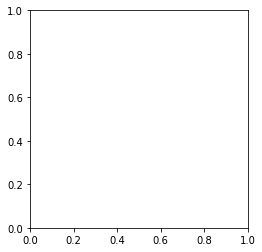

In [33]:
image = images[0, :, :, :]
image = np.reshape(image, [28, 28])
plt.imshow(image, cmap='gray')

In [31]:
image.shape

(256, 28, 28, 1)